In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re
from versions import versions

%matplotlib inline

In [2]:
patches = []
for i in versions:
    df = pd.read_json('http://ddragon.leagueoflegends.com/cdn/{}/data/en_US/champion.json'.format(i))
    champs = []
    for champ in df.index:
        temp_df = pd.DataFrame.from_dict(df.loc[champ, "data"]['stats'], orient='index').reset_index().pivot(columns='index')
        temp_df.columns = temp_df.columns.droplevel()
        temp_df[champ] = champ
        temp_df = temp_df.groupby(champ).mean()
        champs.append(temp_df.copy())
    df = df.merge(pd.concat(champs), left_index=True, right_index=True, how='outer').drop(columns=['format', 'data'])
    patches.append(df)
base_stats = pd.concat(patches, sort=False)

In [3]:
base_stats.version = base_stats.version.apply(lambda x: re.search('(\d\.\d{1,2})\.', x).group(1))

In [4]:
base_stats.version = base_stats.version.apply(lambda x: x[:2] + '0' + x[2:] if len(x) == 3 else x)

In [5]:
master_df = base_stats.copy()

In [6]:
master_df.reset_index(inplace=True)

In [7]:
master_df.rename(columns={'index':'champion'}, inplace=True)

In [8]:
master_df.to_pickle('all_base_stats.pkl')

Summary Stats

In [9]:
master_df.groupby('version').mean().reset_index()

,version,armor,armorperlevel,attackdamage,attackdamageperlevel,attackrange,attackspeed,attackspeedperlevel,crit,critperlevel,...,hpregen,hpregenperlevel,movespeed,mp,mpperlevel,mpregen,mpregenperlevel,spellblock,spellblockperlevel,attackspeedoffset
0,4.01,14.258120,3.469658,50.963590,3.188953,315.213675,NaN,2.511256,0.0,0.0,...,6.021795,0.648718,338.162393,205.264957,36.876068,7.673077,0.471581,30.000000,0.576923,-0.031448
1,4.02,14.258120,3.469658,50.963590,3.188953,314.786325,NaN,2.511256,0.0,0.0,...,5.996154,0.648718,338.162393,205.162393,36.893162,7.664530,0.472009,30.000000,0.576923,-0.031448
2,4.03,14.238983,3.469915,50.969492,3.188552,316.567797,NaN,2.501500,0.0,0.0,...,5.983475,0.647881,338.177966,205.542373,36.961864,7.658898,0.473093,30.000000,0.572034,-0.031182
3,4.04,14.238983,3.469915,50.969492,3.188552,316.779661,NaN,2.501500,0.0,0.0,...,5.983475,0.647881,338.220339,205.542373,36.961864,7.658898,0.473093,30.000000,0.572034,-0.031182
4,4.05,18.213559,3.469915,50.967119,3.189611,316.567797,NaN,2.501500,0.0,0.0,...,5.966525,0.647881,338.135593,205.542373,36.961864,7.658898,0.473093,30.000000,0.582627,-0.031182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,9.17,30.100745,3.474483,59.355197,3.257494,320.551724,0.646786,2.453290,0.0,0.0,...,6.629310,0.666552,336.400000,308.819724,32.868966,8.415331,0.558103,31.182759,0.896897,NaN
134,9.18,30.080055,3.471034,59.388438,3.257494,320.551724,0.646786,2.453290,0.0,0.0,...,6.629310,0.666552,336.400000,308.795172,32.868966,8.412297,0.558103,31.182759,0.896897,NaN
135,9.19,30.073159,3.467586,59.402231,3.257494,320.551724,0.646786,2.453290,0.0,0.0,...,6.629310,0.666552,336.400000,308.814483,32.868966,8.412986,0.558103,31.154483,0.896897,NaN
136,9.20,30.085462,3.467586,59.395334,3.254046,322.965517,0.646786,2.458462,0.0,0.0,...,6.629310,0.666552,336.400000,308.811172,32.868966,8.417538,0.558103,31.154483,0.896897,NaN


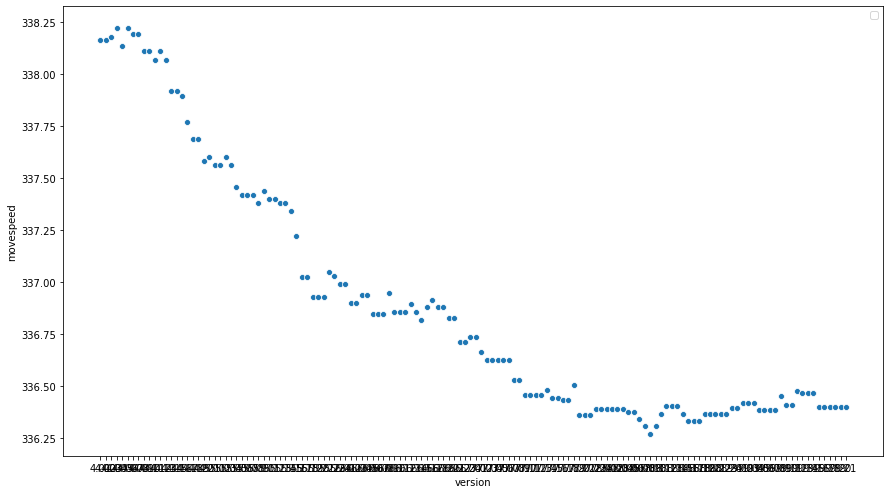

In [10]:
plt.figure(figsize=[14.70, 8.27])
sb.scatterplot(data=master_df.groupby('version').mean().reset_index(), y='movespeed', x='version')
plt.legend('');

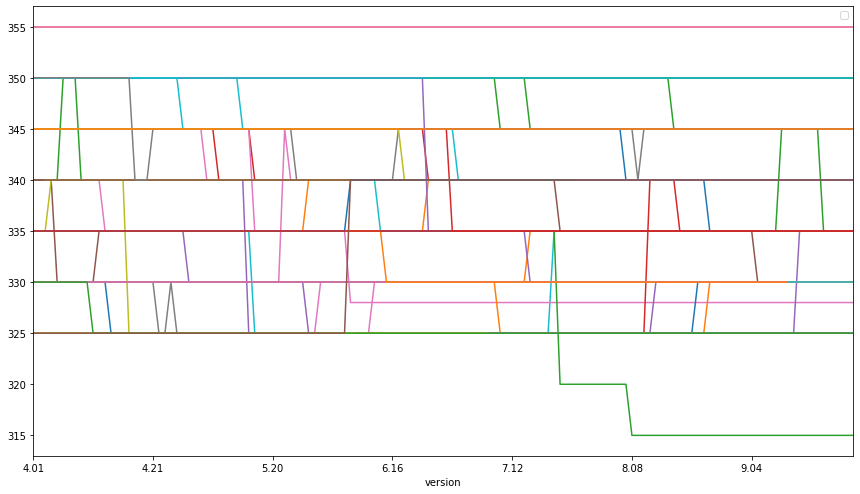

In [11]:
fig, ax = plt.subplots(figsize=[14.70, 8.27])
master_df.groupby(['version', 'champion']).mean().movespeed.unstack().plot(ax=ax)
ax.legend('');